In [1]:
# Librería para el manejo de datos
import pandas as pd

# Librerías para Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns


## Set de datos

In [2]:
# Lectura de los datos del csv para limpieza de outliers
df = pd.read_csv('../Ficheros/csv/df_colum_clean.csv', sep='\t', index_col='id')

In [3]:
df.head()

,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
id,,,,,,,,,,,,,,,,,,,,,
1,A country whose people are not even aware that...,Un país cuyo pueblo ni siquiera es consciente ...,q_en_en-es_d,29,25,positivo,3.0,6.0,2.0,3.0,...,2.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,3.0
2,! - - - - - - Contest Announcement!! - - - - -...,¡! - - - - - ¡Concurso!! ¡- - - - - !,q_en_en-es_d,16,13,neutral,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,17.0
3,! Much Easier to Control the Spread.!,¡! Es mucho más fácil controlar la propagación.!,q_en_en-es_d,7,8,positivo,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0
4,! The Administration can of course clamp Lockd...,"¡! La Administración puede, por supuesto, suje...",q_en_en-es_d,12,13,positivo,3.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,5.0
5,"!!! WE DO’NT YET KNOW, THE DEGREE IF EFFICATIO...","¡¡¡!!! NO SABEMOS TODAVÍA, EL GRADO DE EFICACIA.",q_en_en-es_d,10,8,neutral,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,8.0


In [4]:
# Cantidad de registros del DataFrame
print(f"Cantidad de registros: {df.shape[0]}")

Cantidad de registros: 12042000


In [5]:
# Columnas numéricas
columns_numeric = ['NOUN_source', 'ADJ_source', 'DET_source', 
                'ADV_source', 'CCONJ_source', 'VERB_source',
                'VAUX_source', 'PRON_source', 'ADP_source', 
                'PUNCT_source' ]

## Gráficos

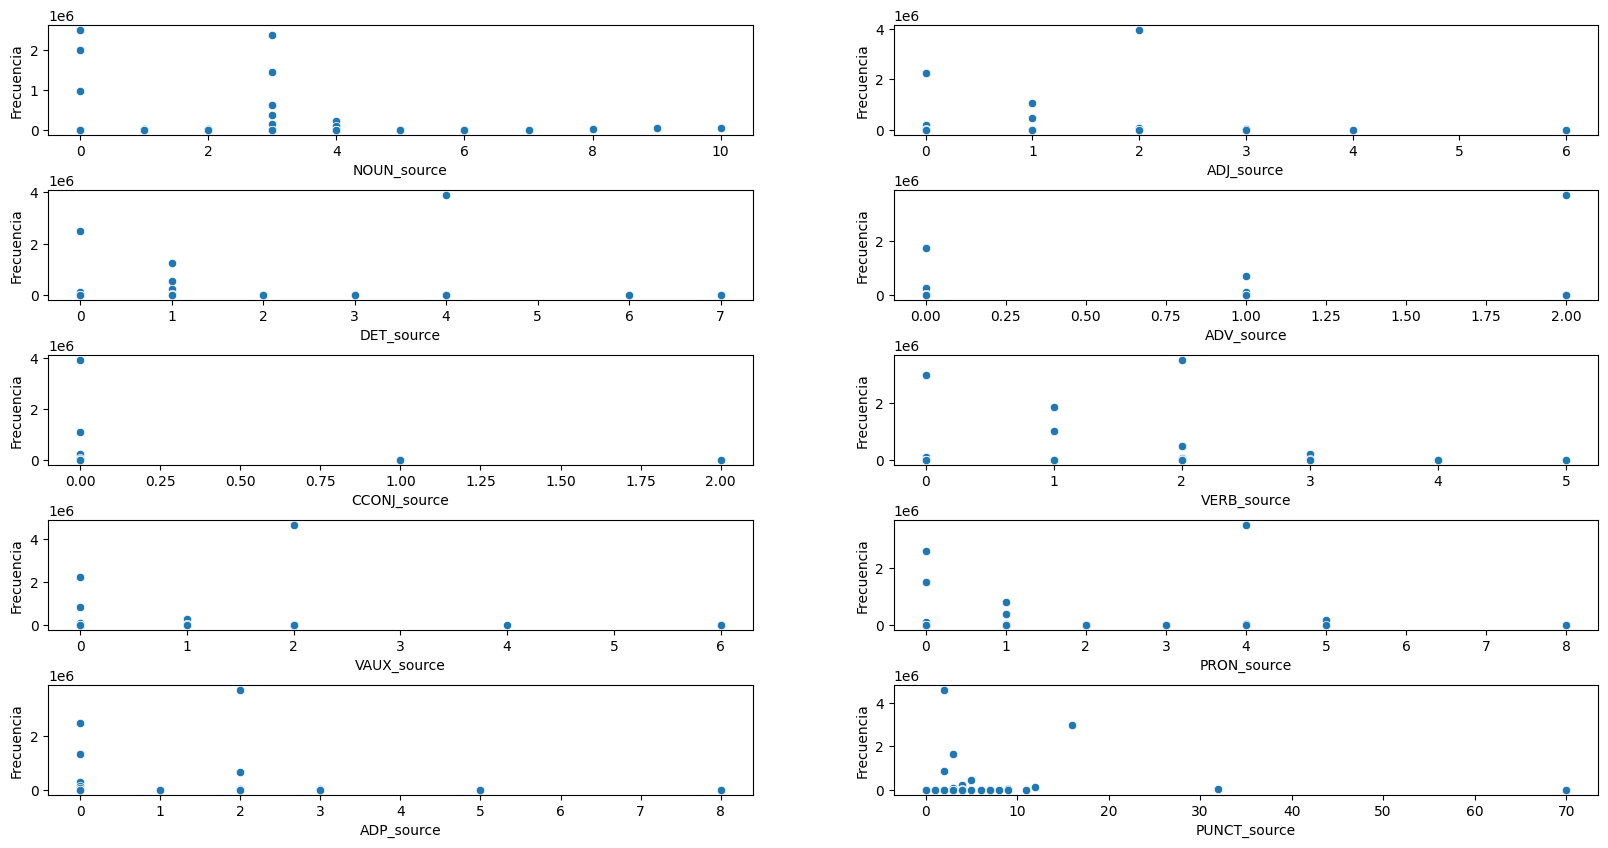

In [6]:
# Distribución de las variables numéricas
plt.figure(figsize=(20, 10))
for i in range(len(columns_numeric)):
    plt.subplot(5, 2, i+1)
    sns.scatterplot(x=df[columns_numeric[i]], y=df[columns_numeric[i]].value_counts())
    plt.xlabel(columns_numeric[i])                      # Etiqueta del eje x
    plt.ylabel('Frecuencia')                            # Etiqueta del eje y
    plt.subplots_adjust(hspace=0.5)                     # Separa los gráficos con un espacio de 0.5
plt.show() 


**Observaciones**
- Las variables NOUN_source, ADJ_source, DET_source, ADV_source, CCONJ_source, VERB_source, VAUX_source, PRON_source, ADP_source, PUNCT_source tienen outliers en sus datos. 
- Por lo que se analizaran los datos de estas variables para determinar cuales son sus valores extremos.


/var/folders/j7/f0dlbvv5239_cpgr1x6831pc0000gn/T/ipykernel_59539/246916770.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns_numeric[i]], kde=False)     # Histograma de la variable numerica sin la curva de densidad estimada (KDE)


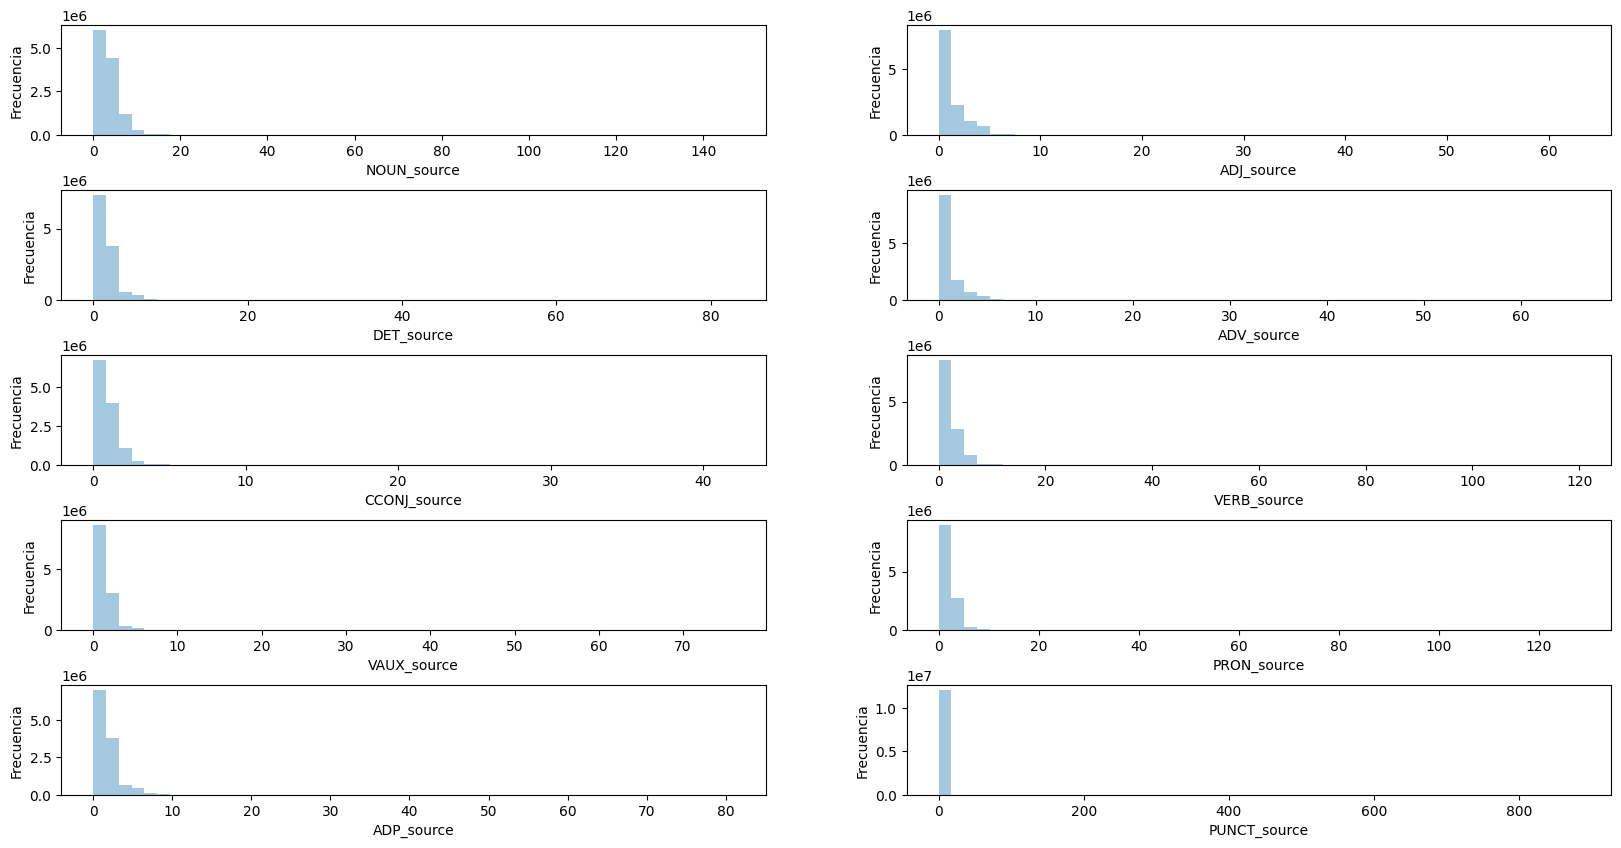

In [7]:
# Histograma de variables numéricas
plt.figure(figsize=(20, 10))
for i in range(len(columns_numeric)):
    plt.subplot(5, 2, i+1)
    sns.distplot(df[columns_numeric[i]], kde=False)     # Histograma de la variable numerica sin la curva de densidad estimada (KDE)
    plt.xlabel(columns_numeric[i])                      # Etiqueta del eje x
    plt.ylabel('Frecuencia')                            # Etiqueta del eje y
    plt.subplots_adjust(hspace=0.5)                     # Separa los graficos con un espacio de 0.5
plt.show()

**Observaciones**

1. Las variables numéricas tienen una distribución normal con una cola a la derecha.
2. La cola de la distribución se extiende hacia los valores más altos de la variable.
3. Por lo que indica que tienen un sesgo hacia la derecha.

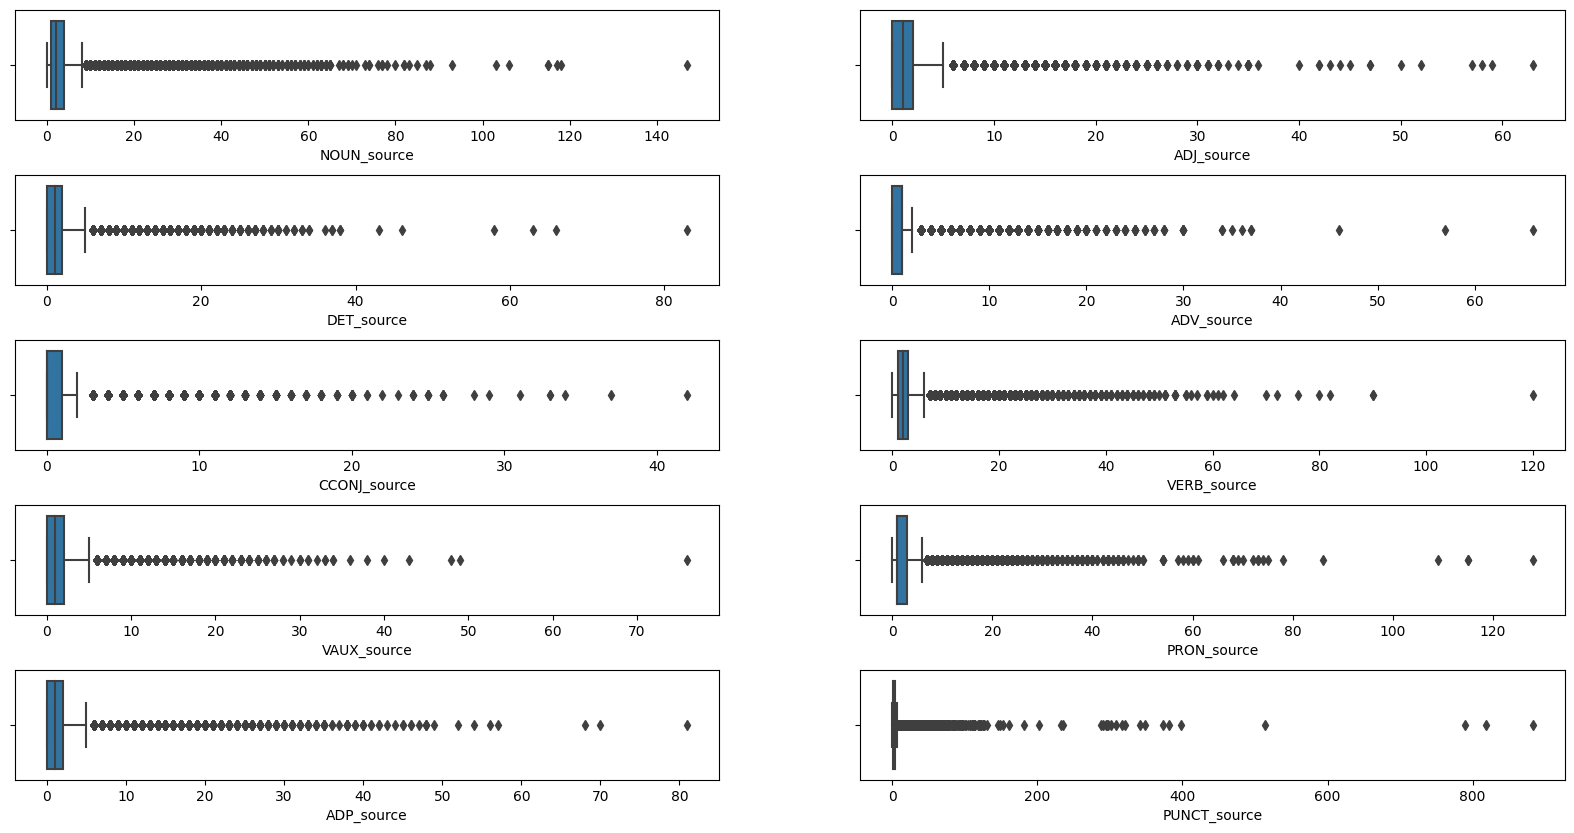

In [9]:
# Boxplot de variables numéricas

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20,10)) 
fig.subplots_adjust(hspace=0.5)                

for i, col in enumerate(columns_numeric):
    sns.boxplot(x=col, data=df, ax=ax[i//2][i%2])           # ax[i//2][i%2] es la posición del subplot
    

    
plt.show()  # Mostrar los gráficos

**Observaciones**
- Como se muestra en las gráficas boxplot, las variables numéricas tienen valores atípicos. 
- Existen valores alejados del rango de los demás valores en la distribución (en este caso valores que se encuentran por encima del wisker superior).

### Outliers en variables numéricas

A continuación se muestra una función que permite identificar los outliers de las variables numéricas.<br>
Una vez identificado los valores atípicos se puede tomar una decisión de como manejarlos.

In [10]:
# Función para obtener los outliers de una variable numérica
def outliers(df, variable):
    # Obtener los cuartiles
    q1 = df[variable].quantile(0.25)                # Primer cuartil
    q3 = df[variable].quantile(0.75)                # Tercer cuartil
    # Obtiene el rango intercuartil
    iqr = q3 - q1
    # Obtiene el límite superior e inferior
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    print('Límite superior: ', upper_limit)
    print('Límite inferior: ', lower_limit)
    # Obtiene los outliers
    outliers = df[(df[variable] > upper_limit) | (df[variable] < lower_limit)]
    # Retorna los outliers
    return outliers

Variable NOUN_Source

In [12]:
# Muestra los valores outliers de la variable NOUN_source
out_NOUN = outliers(df, 'NOUN_source')
out_NOUN.head()

Límite superior:  8.5
Límite inferior:  -3.5


,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
id,,,,,,,,,,,,,,,,,,,,,
11,!!There are lof differences between these thre...,Hay muchas diferencias entre estos tres Holoca...,q_en_en-es_d,45,43,neutral,10.0,10.0,0.0,1.0,...,2.0,0.0,6.0,7.0,3.0,0.0,8.0,9.0,9.0,7.0
12,"!!This cataclyscm is still ongoing , so please...","¡Esta catástrofe todavía está en curso, así qu...",q_en_en-es_d,43,46,positivo,9.0,12.0,3.0,2.0,...,4.0,4.0,2.0,2.0,3.0,0.0,5.0,8.0,70.0,68.0
113,#Unemployment Rate - 23.5% in May 2020 (4.9% i...,"#Tasa de desempleo - 23,5% en mayo de 2020 (4,...",q_en_en-es_d,31,36,positivo,10.0,9.0,1.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,6.0,8.0,4.0,4.0
159,%3C 40 years of age) with only mild symptoms a...,%3C 40 años de edad) con sólo síntomas leves y...,q_en_en-es_d,37,43,positivo,11.0,10.0,5.0,5.0,...,4.0,3.0,3.0,3.0,1.0,1.0,3.0,7.0,4.0,4.0
164,%3C%3C%3C and in spite of these and other fact...,"%3C%3C%3C y a pesar de estos y otros hechos, t...",q_en_en-es_d,49,52,positivo,9.0,11.0,10.0,4.0,...,3.0,4.0,4.0,3.0,3.0,6.0,6.0,9.0,6.0,6.0


In [13]:
# Cantidad de outliers de la variable NOUN_source
print(f"Cantidad de outliers NOUN_source: {out_NOUN.shape[0]}")

Cantidad de outliers NOUN_source: 367467


Variable ADJ_Source

In [14]:
# Muestra los valores outliers de la variable ADJ_source
out_ADJ = outliers(df, 'ADJ_source')
out_ADJ.head()

Límite superior:  5.0
Límite inferior:  -3.0


,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
id,,,,,,,,,,,,,,,,,,,,,
58,#2 -- A few additional variants are quite poss...,#2 -- Es muy posible que haya algunas variante...,q_en_en-es_d,42,55,positivo,7.0,9.0,6.0,6.0,...,7.0,5.0,3.0,6.0,2.0,2.0,1.0,4.0,6.0,8.0
82,#COVID19 infections are extremely serious and ...,Las infecciones por #COVID19 son extremadament...,q_en_en-es_d,29,36,positivo,4.0,4.0,9.0,6.0,...,2.0,3.0,3.0,3.0,3.0,4.0,1.0,5.0,5.0,5.0
164,%3C%3C%3C and in spite of these and other fact...,"%3C%3C%3C y a pesar de estos y otros hechos, t...",q_en_en-es_d,49,52,positivo,9.0,11.0,10.0,4.0,...,3.0,4.0,4.0,3.0,3.0,6.0,6.0,9.0,6.0,6.0
166,%3C%3C%3C did govt’s know more than is apparen...,"Y si esto es así, ¿cuándo los gobiernos ""se di...",q_en_en-es_d,63,56,positivo,10.0,12.0,6.0,4.0,...,7.0,5.0,4.0,1.0,6.0,4.0,5.0,9.0,13.0,10.0
214,"65 years of age, immunosuppressed, and/or high...","65 años de edad, inmunodeprimidos, y/o condici...",q_en_en-es_d,25,30,positivo,11.0,10.0,6.0,5.0,...,3.0,2.0,1.0,1.0,0.0,1.0,3.0,5.0,7.0,6.0


In [15]:
# Cantidad de outliers de la variable ADJ_source
print(f"Cantidad de outliers ADJ_source: {out_ADJ.shape[0]}")

Cantidad de outliers ADJ_source: 147669


Variable DET_Source

In [16]:
# Muestra los valores outliers de la variable DET_source
out_DET = outliers(df, 'DET_source')
out_DET.head()

Límite superior:  5.0
Límite inferior:  -3.0


,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
id,,,,,,,,,,,,,,,,,,,,,
11,!!There are lof differences between these thre...,Hay muchas diferencias entre estos tres Holoca...,q_en_en-es_d,45,43,neutral,10.0,10.0,0.0,1.0,...,2.0,0.0,6.0,7.0,3.0,0.0,8.0,9.0,9.0,7.0
12,"!!This cataclyscm is still ongoing , so please...","¡Esta catástrofe todavía está en curso, así qu...",q_en_en-es_d,43,46,positivo,9.0,12.0,3.0,2.0,...,4.0,4.0,2.0,2.0,3.0,0.0,5.0,8.0,70.0,68.0
178,* COVID-19 Vaccine AstraZeneca can be used in ...,* La Vacuna COVID-19 AstraZeneca puede utiliza...,q_en_en-es_d,47,48,negativo,11.0,10.0,2.0,5.0,...,6.0,3.0,5.0,4.0,1.0,1.0,6.0,6.0,3.0,2.0
229,A suspected case is a person who has acute res...,Un caso sospechoso es una persona que presenta...,q_en_en-es_d,57,58,positivo,19.0,16.0,3.0,7.0,...,6.0,3.0,6.0,4.0,2.0,3.0,6.0,8.0,5.0,5.0
235,"According to experts, there are a variety of r...","Según los expertos, las razones son diversas: ...",q_en_en-es_d,49,57,negativo,18.0,15.0,4.0,3.0,...,3.0,2.0,0.0,1.0,2.0,3.0,10.0,11.0,7.0,6.0


In [17]:
# Cantidad de outliers de la variable DET_source
print(f"Cantidad de outliers DET_source: {out_DET.shape[0]}")

Cantidad de outliers DET_source: 156728


Variable ADV_Source

In [18]:
# Muestra los valores outliers de la variable ADV_source
out_ADV = outliers(df, 'ADV_source')
out_ADV.head()

Límite superior:  2.5
Límite inferior:  -1.5


,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
id,,,,,,,,,,,,,,,,,,,,,
58,#2 -- A few additional variants are quite poss...,#2 -- Es muy posible que haya algunas variante...,q_en_en-es_d,42,55,positivo,7.0,9.0,6.0,6.0,...,7.0,5.0,3.0,6.0,2.0,2.0,1.0,4.0,6.0,8.0
82,#COVID19 infections are extremely serious and ...,Las infecciones por #COVID19 son extremadament...,q_en_en-es_d,29,36,positivo,4.0,4.0,9.0,6.0,...,2.0,3.0,3.0,3.0,3.0,4.0,1.0,5.0,5.0,5.0
141,$2.2 trillion for 9 times more people is still...,"2,2 billones de dólares para 9 veces más perso...",q_en_en-es_d,20,28,positivo,5.0,9.0,2.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,2.0,6.0,1.0,1.0
155,"£120,000 is laughable compensation when you lo...",120.000 libras es una indemnización irrisoria ...,q_en_en-es_d,40,40,negativo,7.0,8.0,2.0,1.0,...,8.0,8.0,2.0,2.0,4.0,1.0,3.0,3.0,6.0,6.0
166,%3C%3C%3C did govt’s know more than is apparen...,"Y si esto es así, ¿cuándo los gobiernos ""se di...",q_en_en-es_d,63,56,positivo,10.0,12.0,6.0,4.0,...,7.0,5.0,4.0,1.0,6.0,4.0,5.0,9.0,13.0,10.0


In [19]:
# Cantidad de outliers de la variable ADV_source
print(f"Cantidad de outliers ADV_source: {out_ADV.shape[0]}")

Cantidad de outliers ADV_source: 1085548


Variable CCONJ_Source

In [20]:
# Muestra los valores outliers de la variable CCONJ_source
out_CCONJ = outliers(df, 'CCONJ_source')
out_CCONJ.head()

Límite superior:  2.5
Límite inferior:  -1.5


,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
id,,,,,,,,,,,,,,,,,,,,,
58,#2 -- A few additional variants are quite poss...,#2 -- Es muy posible que haya algunas variante...,q_en_en-es_d,42,55,positivo,7.0,9.0,6.0,6.0,...,7.0,5.0,3.0,6.0,2.0,2.0,1.0,4.0,6.0,8.0
82,#COVID19 infections are extremely serious and ...,Las infecciones por #COVID19 son extremadament...,q_en_en-es_d,29,36,positivo,4.0,4.0,9.0,6.0,...,2.0,3.0,3.0,3.0,3.0,4.0,1.0,5.0,5.0,5.0
155,"£120,000 is laughable compensation when you lo...",120.000 libras es una indemnización irrisoria ...,q_en_en-es_d,40,40,negativo,7.0,8.0,2.0,1.0,...,8.0,8.0,2.0,2.0,4.0,1.0,3.0,3.0,6.0,6.0
166,%3C%3C%3C did govt’s know more than is apparen...,"Y si esto es así, ¿cuándo los gobiernos ""se di...",q_en_en-es_d,63,56,positivo,10.0,12.0,6.0,4.0,...,7.0,5.0,4.0,1.0,6.0,4.0,5.0,9.0,13.0,10.0
213,2Ch 7:14 if my people who are called by my nam...,"2C 7:14 si mi pueblo, llamado por mi nombre, s...",q_en_en-es_d,40,38,negativo,6.0,7.0,2.0,2.0,...,7.0,6.0,3.0,0.0,9.0,3.0,3.0,3.0,3.0,4.0


In [21]:
# Cantidad de outliers de la variable CCONJ_source
print(f"Cantidad de outliers CCONJ_source: {out_CCONJ.shape[0]}")

Cantidad de outliers CCONJ_source: 325379


Variable VERB_Source

In [22]:
# Muestra los valores outliers de la variable VERB_source
out_VERB = outliers(df, 'VERB_source')
out_VERB.head()

Límite superior:  6.0
Límite inferior:  -2.0


,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
id,,,,,,,,,,,,,,,,,,,,,
58,#2 -- A few additional variants are quite poss...,#2 -- Es muy posible que haya algunas variante...,q_en_en-es_d,42,55,positivo,7.0,9.0,6.0,6.0,...,7.0,5.0,3.0,6.0,2.0,2.0,1.0,4.0,6.0,8.0
155,"£120,000 is laughable compensation when you lo...",120.000 libras es una indemnización irrisoria ...,q_en_en-es_d,40,40,negativo,7.0,8.0,2.0,1.0,...,8.0,8.0,2.0,2.0,4.0,1.0,3.0,3.0,6.0,6.0
165,%3C%3C%3C but the sickest thing about C19 is t...,%3C%3C%3C pero lo más enfermizo del C19 es que...,q_en_en-es_d,65,65,positivo,14.0,9.0,4.0,4.0,...,8.0,8.0,6.0,6.0,8.0,4.0,11.0,12.0,7.0,6.0
166,%3C%3C%3C did govt’s know more than is apparen...,"Y si esto es así, ¿cuándo los gobiernos ""se di...",q_en_en-es_d,63,56,positivo,10.0,12.0,6.0,4.0,...,7.0,5.0,4.0,1.0,6.0,4.0,5.0,9.0,13.0,10.0
168,%3C%3C%3C … so it’s all not nearly as simple a...,%3C%3C%3C ... así que no es todo tan sencillo ...,q_en_en-es_d,63,66,positivo,6.0,9.0,4.0,2.0,...,9.0,9.0,5.0,6.0,14.0,10.0,6.0,10.0,7.0,7.0


In [23]:
# Cantidad de outliers de la variable VERB_source
print(f"Cantidad de outliers VERB_source: {out_VERB.shape[0]}")

Cantidad de outliers VERB_source: 194710


Variable VAUX_Source

In [24]:
# Muestra los valores outliers de la variable VAUX_source
out_VAUX = outliers(df, 'VAUX_source')
out_VAUX.head()

Límite superior:  5.0
Límite inferior:  -3.0


,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
id,,,,,,,,,,,,,,,,,,,,,
11,!!There are lof differences between these thre...,Hay muchas diferencias entre estos tres Holoca...,q_en_en-es_d,45,43,neutral,10.0,10.0,0.0,1.0,...,2.0,0.0,6.0,7.0,3.0,0.0,8.0,9.0,9.0,7.0
165,%3C%3C%3C but the sickest thing about C19 is t...,%3C%3C%3C pero lo más enfermizo del C19 es que...,q_en_en-es_d,65,65,positivo,14.0,9.0,4.0,4.0,...,8.0,8.0,6.0,6.0,8.0,4.0,11.0,12.0,7.0,6.0
167,%3C%3C%3C do you get it… ?! they’ve been cycli...,%3C%3C%3C ¿lo entienden...?! han estado ciclan...,q_en_en-es_d,43,48,negativo,9.0,10.0,3.0,2.0,...,2.0,3.0,6.0,4.0,6.0,2.0,5.0,8.0,7.0,8.0
229,A suspected case is a person who has acute res...,Un caso sospechoso es una persona que presenta...,q_en_en-es_d,57,58,positivo,19.0,16.0,3.0,7.0,...,6.0,3.0,6.0,4.0,2.0,3.0,6.0,8.0,5.0,5.0
349,"Darwin, the naturalist, says of the inhabitant...","Darwin, el naturalista, dice de los habitantes...",q_en_en-es_d,72,73,positivo,11.0,10.0,6.0,6.0,...,8.0,8.0,6.0,3.0,6.0,8.0,9.0,10.0,17.0,16.0


In [25]:
# Cantidad de outliers de la variable VAUX_source
print(f"Cantidad de outliers VAUX_source: {out_VAUX.shape[0]}")

Cantidad de outliers VAUX_source: 52224


Variable PRON_Source

In [26]:
# Muestra los valores outliers de la variable PRON_source
out_PRON = outliers(df, 'PRON_source')
out_PRON.head()

Límite superior:  6.0
Límite inferior:  -2.0


,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
id,,,,,,,,,,,,,,,,,,,,,
49,#10 It’s also a lot about how to think about i...,#10 También se trata de cómo pensar en ello: d...,q_en_en-es_d,38,37,positivo,5.0,4.0,4.0,5.0,...,5.0,6.0,2.0,1.0,8.0,8.0,5.0,5.0,2.0,2.0
165,%3C%3C%3C but the sickest thing about C19 is t...,%3C%3C%3C pero lo más enfermizo del C19 es que...,q_en_en-es_d,65,65,positivo,14.0,9.0,4.0,4.0,...,8.0,8.0,6.0,6.0,8.0,4.0,11.0,12.0,7.0,6.0
168,%3C%3C%3C … so it’s all not nearly as simple a...,%3C%3C%3C ... así que no es todo tan sencillo ...,q_en_en-es_d,63,66,positivo,6.0,9.0,4.0,2.0,...,9.0,9.0,5.0,6.0,14.0,10.0,6.0,10.0,7.0,7.0
210,"103 °F - Are you testing me, Satan? Preparing ...","103 °F - ¿Me estás poniendo a prueba, Satanás?...",q_en_en-es_d,38,41,positivo,4.0,7.0,5.0,2.0,...,6.0,6.0,3.0,2.0,7.0,3.0,4.0,6.0,8.0,12.0
213,2Ch 7:14 if my people who are called by my nam...,"2C 7:14 si mi pueblo, llamado por mi nombre, s...",q_en_en-es_d,40,38,negativo,6.0,7.0,2.0,2.0,...,7.0,6.0,3.0,0.0,9.0,3.0,3.0,3.0,3.0,4.0


In [27]:
# Cantidad de outliers de la variable PRON_source
print(f"Cantidad de outliers PRON_source: {out_PRON.shape[0]}")

Cantidad de outliers PRON_source: 167828


Variable ADP_Source

In [28]:
# Muestra los valores outliers de la variable ADP_source
out_ADP = outliers(df, 'ADP_source')
out_ADP.head()

Límite superior:  5.0
Límite inferior:  -3.0


,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
id,,,,,,,,,,,,,,,,,,,,,
11,!!There are lof differences between these thre...,Hay muchas diferencias entre estos tres Holoca...,q_en_en-es_d,45,43,neutral,10.0,10.0,0.0,1.0,...,2.0,0.0,6.0,7.0,3.0,0.0,8.0,9.0,9.0,7.0
113,#Unemployment Rate - 23.5% in May 2020 (4.9% i...,"#Tasa de desempleo - 23,5% en mayo de 2020 (4,...",q_en_en-es_d,31,36,positivo,10.0,9.0,1.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,6.0,8.0,4.0,4.0
154,"$850 million worth, including $600 million her...","El valor de 850 millones de dólares, incluyend...",q_en_en-es_d,34,42,positivo,7.0,11.0,2.0,2.0,...,3.0,2.0,2.0,1.0,1.0,2.0,7.0,10.0,3.0,3.0
164,%3C%3C%3C and in spite of these and other fact...,"%3C%3C%3C y a pesar de estos y otros hechos, t...",q_en_en-es_d,49,52,positivo,9.0,11.0,10.0,4.0,...,3.0,4.0,4.0,3.0,3.0,6.0,6.0,9.0,6.0,6.0
165,%3C%3C%3C but the sickest thing about C19 is t...,%3C%3C%3C pero lo más enfermizo del C19 es que...,q_en_en-es_d,65,65,positivo,14.0,9.0,4.0,4.0,...,8.0,8.0,6.0,6.0,8.0,4.0,11.0,12.0,7.0,6.0


In [29]:
# Cantidad de outliers de la variable ADP_source
print(f"Cantidad de outliers ADP_source: {out_ADP.shape[0]}")

Cantidad de outliers ADP_source: 264733


Variable PUNCT_Source

In [30]:
# Muestra los valores outliers de la variable PUNCT_source
out_PUNCT = outliers(df, 'PUNCT_source')
out_PUNCT.head()

Límite superior:  6.0
Límite inferior:  -2.0


,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
id,,,,,,,,,,,,,,,,,,,,,
2,! - - - - - - Contest Announcement!! - - - - -...,¡! - - - - - ¡Concurso!! ¡- - - - - !,q_en_en-es_d,16,13,neutral,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,17.0
7,!!!! PAY ATTENTION !!!! Covid-19 is not a VIRU...,¡¡¡¡!!!! ¡¡¡¡ATENCIÓN !!!! ¡¡¡¡Covid-19 no es ...,q_en_en-es_d,10,9,neutral,3.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,12.0,24.0
9,!!Lastly I have a request to all of you that p...,Por último os pido que os quedéis en casa y ma...,q_en_en-es_d,21,17,positivo,3.0,4.0,1.0,1.0,...,3.0,3.0,0.0,0.0,4.0,2.0,3.0,3.0,32.0,29.0
11,!!There are lof differences between these thre...,Hay muchas diferencias entre estos tres Holoca...,q_en_en-es_d,45,43,neutral,10.0,10.0,0.0,1.0,...,2.0,0.0,6.0,7.0,3.0,0.0,8.0,9.0,9.0,7.0
12,"!!This cataclyscm is still ongoing , so please...","¡Esta catástrofe todavía está en curso, así qu...",q_en_en-es_d,43,46,positivo,9.0,12.0,3.0,2.0,...,4.0,4.0,2.0,2.0,3.0,0.0,5.0,8.0,70.0,68.0


In [31]:
# Cantidad de outliers de la variable PUNCT_source
print(f"Cantidad de outliers PUNCT_source: {out_PUNCT.shape[0]}")

Cantidad de outliers PUNCT_source: 300979


In [32]:
# Mostrar el source de los outliers de la variable out_PUNCT
out_PUNCT['target']

id
2                       ¡! - - - - - ¡Concurso!! ¡- - - - - !
7           ¡¡¡¡!!!! ¡¡¡¡ATENCIÓN !!!! ¡¡¡¡Covid-19 no es ...
9           Por último os pido que os quedéis en casa y ma...
11          Hay muchas diferencias entre estos tres Holoca...
12          ¡Esta catástrofe todavía está en curso, así qu...
                                  ...                        
12147884    Como sabía urdu, también escribió sobre (Maula...
12147939    Porque sí, y es difícil imaginar que los produ...
12147941    'Porque ni siquiera tengo redes sociales, no t...
12147953    'Porque si no es tan grave, omnipresente y obj...
12147966    'Porque si no están allí el sábado, y nos pres...
Name: target, Length: 300979, dtype: object

In [33]:
out_PUNCT.loc[9542941, 'target']

'* Eliminar Crapware / Bloatware preinstalado - Desinstalar ese molesto, batería-draining, espacio-wasting crapware que viene preinstalado en tantos teléfonos en estos días-y, por desgracia, esta función es root-only.'

In [34]:
out_PUNCT.loc[12, 'target']

'¡Esta catástrofe todavía está en curso, así que por favor siga todas las directrices y siga los objetivos de distanciamiento social ???????????????????????????????? es nuestro deber ayudar a nuestro gobierno y hacer algunas cosas buenas por el bien de la humanidad en esta guerra contra Covid, ????????????????????????????????!'

**Observaciones** <br> <br>
Luego de analizar el comportamiento de los outliers en las variables numéricas de la fuente inglesa, se pudo observar que: 
- En la variable PUNCT_source: hay repeticiones de signos de puntuación.
- En las demás variables: puede ser que las frases sean muy largas.

### Eliminar outliers

In [35]:
# Muestra en un dataframe todos los outliers de las variables numéricas de la fuente "inglés"
outliers_source = pd.concat([out_NOUN, out_ADJ, out_DET, out_ADV, out_CCONJ, out_VERB, out_VAUX, out_PRON, out_ADP, out_PUNCT])
outliers_source.head()

,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
id,,,,,,,,,,,,,,,,,,,,,
11,!!There are lof differences between these thre...,Hay muchas diferencias entre estos tres Holoca...,q_en_en-es_d,45,43,neutral,10.0,10.0,0.0,1.0,...,2.0,0.0,6.0,7.0,3.0,0.0,8.0,9.0,9.0,7.0
12,"!!This cataclyscm is still ongoing , so please...","¡Esta catástrofe todavía está en curso, así qu...",q_en_en-es_d,43,46,positivo,9.0,12.0,3.0,2.0,...,4.0,4.0,2.0,2.0,3.0,0.0,5.0,8.0,70.0,68.0
113,#Unemployment Rate - 23.5% in May 2020 (4.9% i...,"#Tasa de desempleo - 23,5% en mayo de 2020 (4,...",q_en_en-es_d,31,36,positivo,10.0,9.0,1.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,6.0,8.0,4.0,4.0
159,%3C 40 years of age) with only mild symptoms a...,%3C 40 años de edad) con sólo síntomas leves y...,q_en_en-es_d,37,43,positivo,11.0,10.0,5.0,5.0,...,4.0,3.0,3.0,3.0,1.0,1.0,3.0,7.0,4.0,4.0
164,%3C%3C%3C and in spite of these and other fact...,"%3C%3C%3C y a pesar de estos y otros hechos, t...",q_en_en-es_d,49,52,positivo,9.0,11.0,10.0,4.0,...,3.0,4.0,4.0,3.0,3.0,6.0,6.0,9.0,6.0,6.0


In [36]:
outliers_source.shape

(3063265, 26)

In [37]:
# Verifica si no se repiten los outliers en la columna source
outliers_source['source'].nunique()

1973686

In [38]:
# Elimina los repetidos
outliers_source = outliers_source.drop_duplicates(subset=['source'])

In [39]:
print(f"Cantidad de outliers de todas las variables numéricas: {outliers_source.shape[0]}")

Cantidad de outliers de todas las variables numéricas: 1973686


In [40]:
# Muestra el source de la frase con id 11
df.loc[11, 'target']

'Hay muchas diferencias entre estos tres Holocausto, estas diferencias pueden ser sobre la base del modo de ocurrencia, puede ser sobre la base de la zona geográficamente afectada, o también puede ser sobre la base de la "complejidad" de estas tres calamidades. .'

In [41]:
# Muestra los id de los outliers
outliers_source.index

Int64Index([      11,       12,      113,      159,      164,      165,
                 166,      167,      178,      179,
            ...
            12147668, 12147717, 12147753, 12147798, 12147811, 12147839,
            12147843, 12147884, 12147941, 12147966],
           dtype='int64', name='id', length=1973686)

**Primera Prueba: Dataframe sin los outliers de la variable out_PUNCT**

In [42]:
# Muestra dataframe sin los outliers de la variable out_PUNCT
df_elim_PUNCT = df.drop(out_PUNCT.index, axis=0)                   # axis=0 para eliminar filas
df_elim_PUNCT.head()

,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
id,,,,,,,,,,,,,,,,,,,,,
1,A country whose people are not even aware that...,Un país cuyo pueblo ni siquiera es consciente ...,q_en_en-es_d,29,25,positivo,3.0,6.0,2.0,3.0,...,2.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,3.0
3,! Much Easier to Control the Spread.!,¡! Es mucho más fácil controlar la propagación.!,q_en_en-es_d,7,8,positivo,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0
4,! The Administration can of course clamp Lockd...,"¡! La Administración puede, por supuesto, suje...",q_en_en-es_d,12,13,positivo,3.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,5.0
5,"!!! WE DO’NT YET KNOW, THE DEGREE IF EFFICATIO...","¡¡¡!!! NO SABEMOS TODAVÍA, EL GRADO DE EFICACIA.",q_en_en-es_d,10,8,neutral,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,8.0
6,!!! You became its next victim when you entere...,¡¡¡!!! Te convertiste en su próxima víctima cu...,q_en_en-es_d,19,19,negativo,3.0,3.0,2.0,2.0,...,3.0,3.0,1.0,0.0,5.0,4.0,0.0,2.0,4.0,7.0


In [43]:
df_elim_PUNCT.shape[0]

11741021

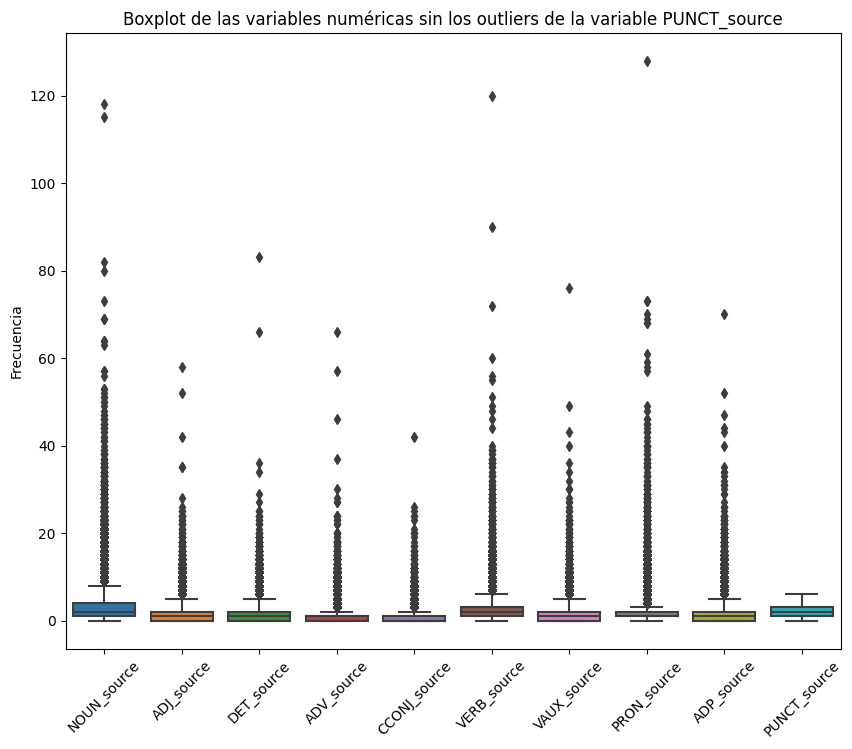

In [44]:
# Boxplot de las variables numéricas del dataframe df_elim_PUNCT sin los outliers de la variable PUNCT_source

plt.figure(figsize=(10, 8))
sns.boxplot(data=df_elim_PUNCT[columns_numeric])

# Rota las etiquetas del eje x
plt.xticks(rotation=45)

# Título del gráfico
plt.title("Boxplot de las variables numéricas sin los outliers de la variable PUNCT_source")

# Nombre del eje y
plt.ylabel("Frecuencia")

# Muestra el gráfico
plt.show()

**Observaciones**<br>
Luego de eliminar los outliers de la variable PUNCT_source, se observa que las demás variables numéricas no mejoraron mucho su distribución

**Segunda Prueba: dataframe resultante eliminando todos los outliers de todas las categorías gramaticales**

In [45]:
# Muestra el dataframe original sin los outliers
df = df.drop(outliers_source.index)

In [46]:
df.head()

,source,target,file_name,quantity_words_source,quantity_words_target,sentiment,NOUN_source,NOUN_target,ADJ_source,ADJ_target,...,VERB_source,VERB_target,VAUX_source,VAUX_target,PRON_source,PRON_target,ADP_source,ADP_target,PUNCT_source,PUNCT_target
id,,,,,,,,,,,,,,,,,,,,,
1,A country whose people are not even aware that...,Un país cuyo pueblo ni siquiera es consciente ...,q_en_en-es_d,29,25,positivo,3.0,6.0,2.0,3.0,...,2.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,3.0
3,! Much Easier to Control the Spread.!,¡! Es mucho más fácil controlar la propagación.!,q_en_en-es_d,7,8,positivo,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0
4,! The Administration can of course clamp Lockd...,"¡! La Administración puede, por supuesto, suje...",q_en_en-es_d,12,13,positivo,3.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,5.0
5,"!!! WE DO’NT YET KNOW, THE DEGREE IF EFFICATIO...","¡¡¡!!! NO SABEMOS TODAVÍA, EL GRADO DE EFICACIA.",q_en_en-es_d,10,8,neutral,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,8.0
6,!!! You became its next victim when you entere...,¡¡¡!!! Te convertiste en su próxima víctima cu...,q_en_en-es_d,19,19,negativo,3.0,3.0,2.0,2.0,...,3.0,3.0,1.0,0.0,5.0,4.0,0.0,2.0,4.0,7.0


In [47]:
# Cantidad de filas del dataframe df sin los outliers
print(f"Observaciones de todas las variables numéricas sin outliers: {df.shape[0]}")

Observaciones de todas las variables numéricas sin outliers: 10068314


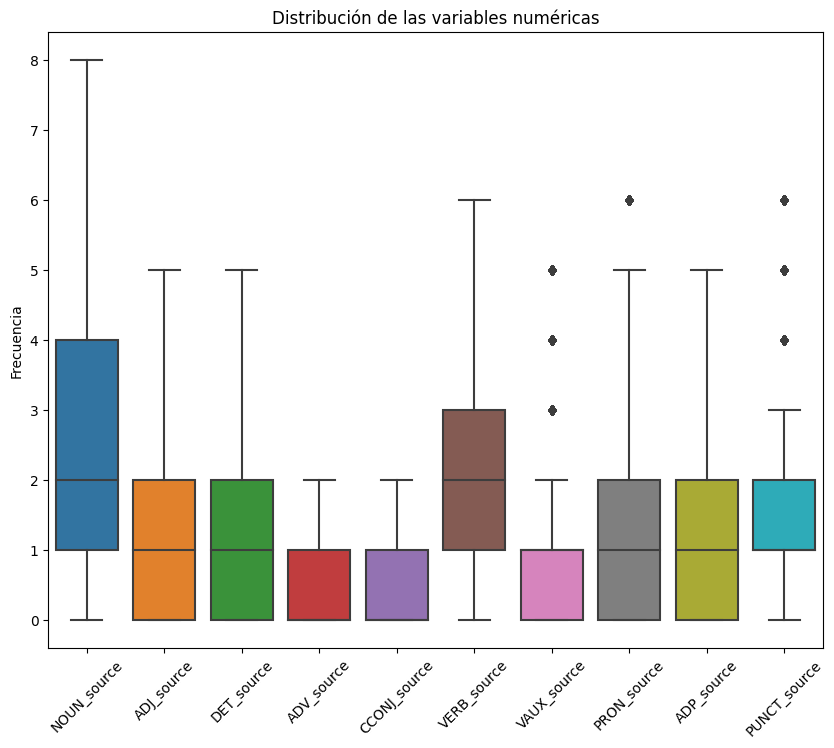

In [48]:
# Boxplot de las variables numéricas del dataframe sin los outliers

plt.figure(figsize=(10, 8))
sns.boxplot(data=df[columns_numeric])

# Rota las etiquetas del eje x
plt.xticks(rotation=45)

# Título del gráfico
plt.title("Distribución de las variables numéricas")

# Nombre del eje y
plt.ylabel("Frecuencia")

# Muestra el gráfico
plt.show()

**Observaciones:**

- Luego de analizado el dataset a través de los boxplots, se observa que:
- Las variables numéricas tienen una distribución asimétrica a la derecha.
- Mejoró la cantidad de valores extremos de las variables numéricas.
- Se eliminaron casi 2.000.000 de observaciones de un total de 12 042 000, cifra no muy significativa, por lo que se tomó esta decisión.


In [50]:
# Guarda el dataframe df sin los outliers en un archivo csv, separado por tabulaciones
df.to_csv('../Ficheros/csv/df_sin_outliers.csv', sep='\t')

[Limpieza_datos](4_limpieza_datos.ipynb)